<a href="https://colab.research.google.com/github/Shuvrodey/Automobile_Sales_Project_Presentation/blob/main/ZomatoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First, let's install and import necessary libraries
!pip install kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('ggplot')
sns.set_palette("husl")

# Download the dataset
import kagglehub
path = kagglehub.dataset_download("bhanupratapbiswas/zomato")
print("Path to dataset files:", path)

# Load the dataset
import os
# Find the CSV file in the downloaded directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
else:
    # If no CSV found, let's check for other files
    all_files = os.listdir(path)
    print("Available files:", all_files)
    # You might need to adjust the file name based on what's available

# Let's assume we found the CSV and loaded it as df
# If the above doesn't work, you might need to manually specify the file path

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst 5 rows:")
df.head()

100%|██████████| 5.28M/5.28M [00:01<00:00, 5.50MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bhanupratapbiswas/zomato/versions/1
Dataset Shape: (56252, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
display(df.describe(include='all')) # Include all columns for describe

# Data Cleaning
# Let's handle missing values and prepare data for analysis

# Drop irrelevant columns that were in the original dataset but not loaded
# columns_to_drop = ['url', 'menu_item', 'reviews_list'] # These columns were not loaded
columns_to_drop = ['phone'] # Keep phone as it has many missing values but might be useful

# Check if columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df_clean = df.drop(columns=existing_columns_to_drop, errors='ignore')

# Handle missing values
# Clean and convert 'rate' column
df_clean['rate'] = df_clean['rate'].astype(str).str.replace('/5', '', regex=False)
df_clean['rate'] = df_clean['rate'].replace('NEW', np.nan).replace('-', np.nan)
df_clean['rate'] = pd.to_numeric(df_clean['rate'], errors='coerce')


# Convert 'approx_cost(for two people)' to numeric
df_clean['approx_cost(for two people)'] = df_clean['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False)
df_clean['approx_cost(for two people)'] = pd.to_numeric(df_clean['approx_cost(for two people)'], errors='coerce')

# Fill missing values in numeric columns with median
df_clean['approx_cost(for two people)'] = df_clean['approx_cost(for two people)'].fillna(df_clean['approx_cost(for two people)'].median())
df_clean['rate'] = df_clean['rate'].fillna(df_clean['rate'].median())
df_clean['votes'] = pd.to_numeric(df_clean['votes'], errors='coerce').fillna(0) # Convert votes to numeric and fill missing with 0


# Clean categorical columns
df_clean['rest_type'] = df_clean['rest_type'].fillna('Unknown')
df_clean['location'] = df_clean['location'].fillna('Unknown')
df_clean['cuisines'] = df_clean['cuisines'].fillna('Unknown')
df_clean['dish_liked'] = df_clean['dish_liked'].fillna('Unknown') # Fill dish_liked as it has many missing values
df_clean['listed_in(type)'] = df_clean['listed_in(type)'].fillna(df_clean['listed_in(type)'].mode()[0])


print("Data cleaning completed!")

# Display info of cleaned data
print("\nCleaned Dataset Info:")
df_clean.info()
print("\nMissing Values after Cleaning:")
print(df_clean.isnull().sum())
print("\nFirst 5 rows of cleaned data:")
display(df_clean.head())

Missing Values:
address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

Basic Statistics:


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,56235,56236,56233,56194,48414,56174,54956,56126,55914,28027,56049,55731,51642
unique,13397,11914,2639,2902,2877,5195,17712,2920,2961,8067,5553,2879,2783
top,('Rated 4.0',('Rated 4.0',Yes,No,NEW,0,('Rated 4.0',BTM,Quick Bites,('Rated 4.0',North Indian,300,Delivery
freq,942,300,30444,45268,2208,10027,412,5125,19132,407,2913,7576,24317


Data cleaning completed!

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      56235 non-null  object 
 1   name                         56236 non-null  object 
 2   online_order                 56233 non-null  object 
 3   book_table                   56194 non-null  object 
 4   rate                         56252 non-null  float64
 5   votes                        56252 non-null  float64
 6   location                     56252 non-null  object 
 7   rest_type                    56252 non-null  object 
 8   dish_liked                   56252 non-null  object 
 9   cuisines                     56252 non-null  object 
 10  approx_cost(for two people)  56252 non-null  float64
 11  listed_in(type)              56252 non-null  object 
dtypes: float64(3), object(9)
m

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


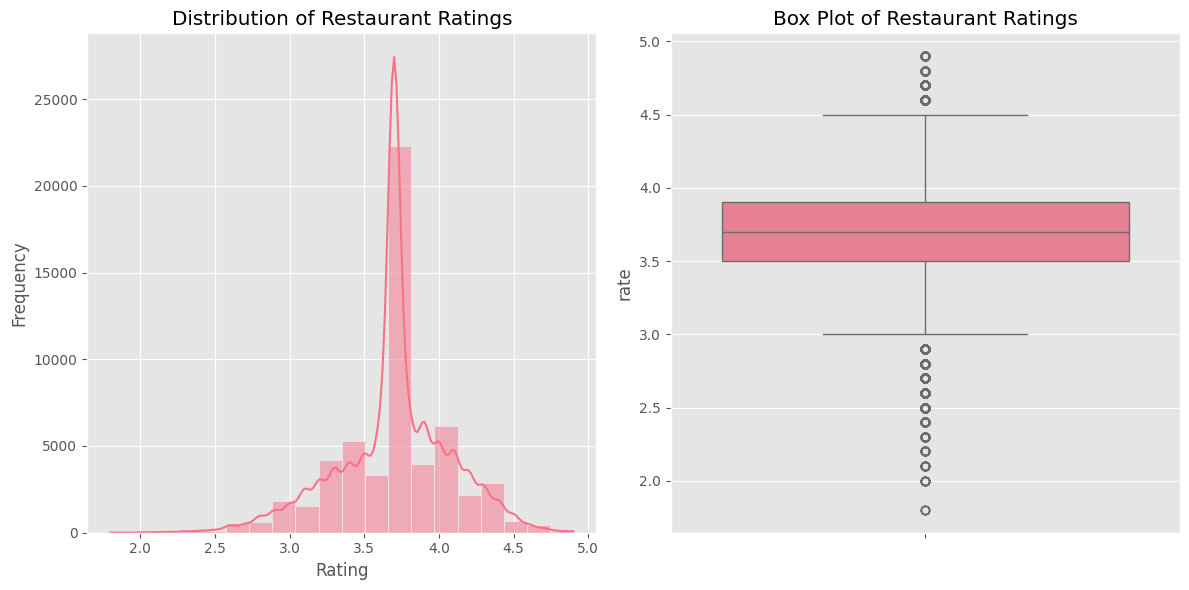

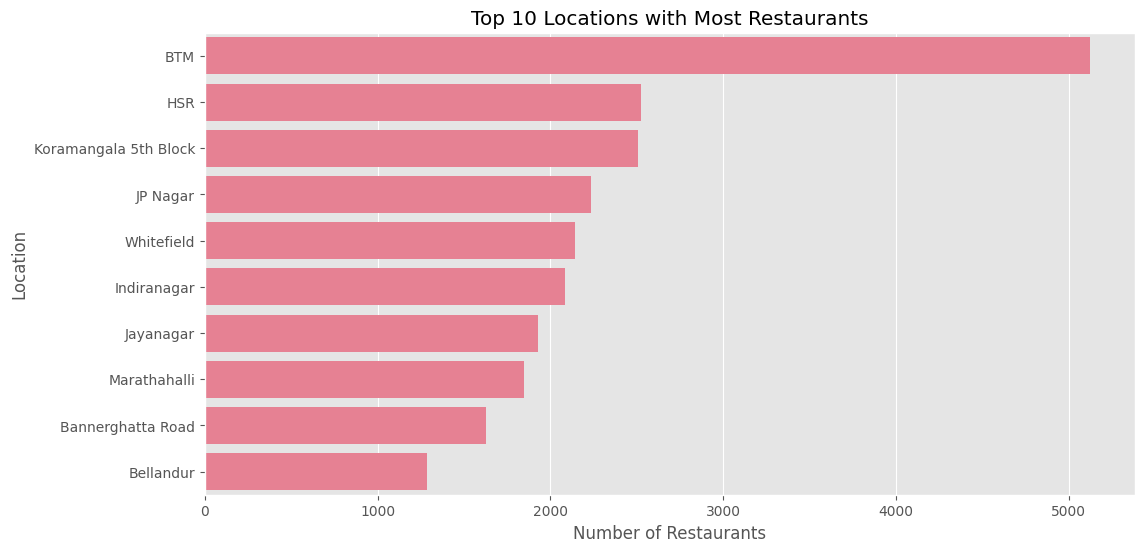

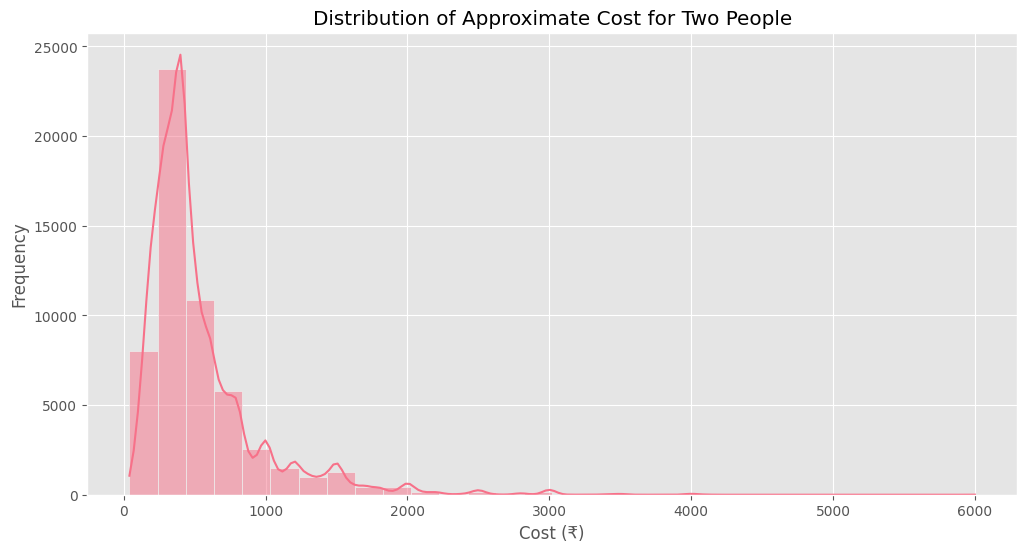

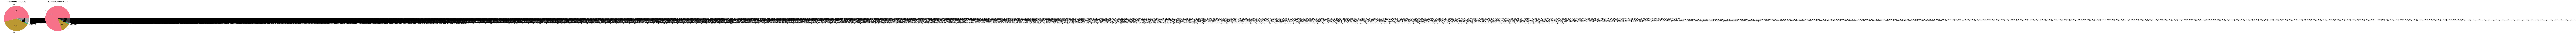

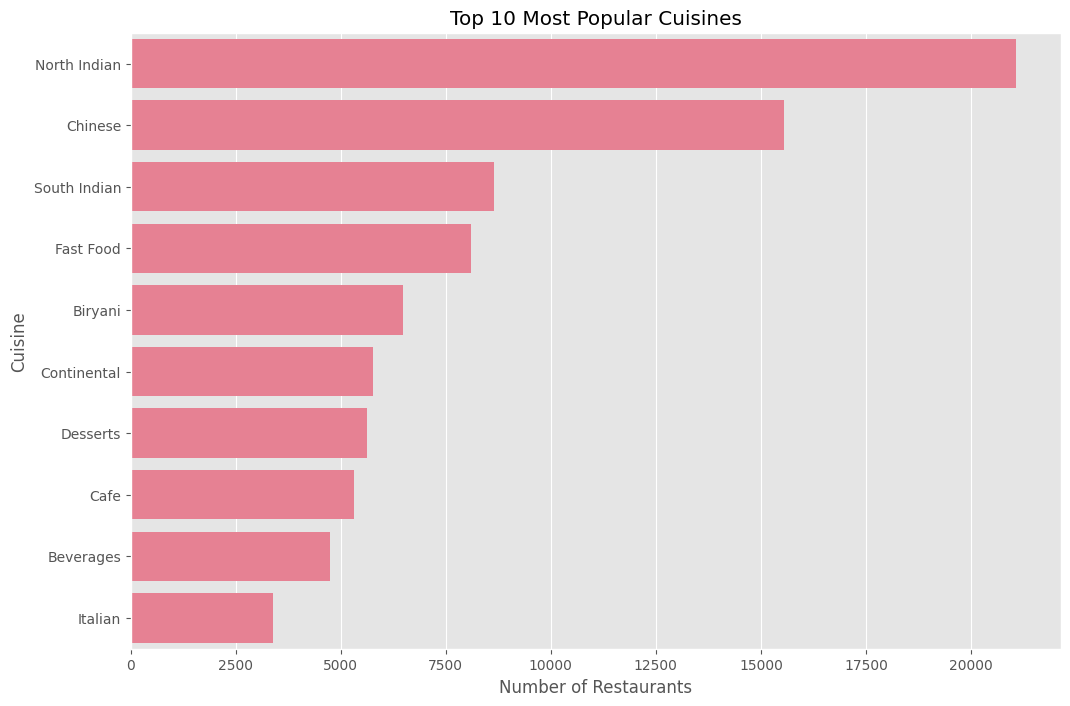

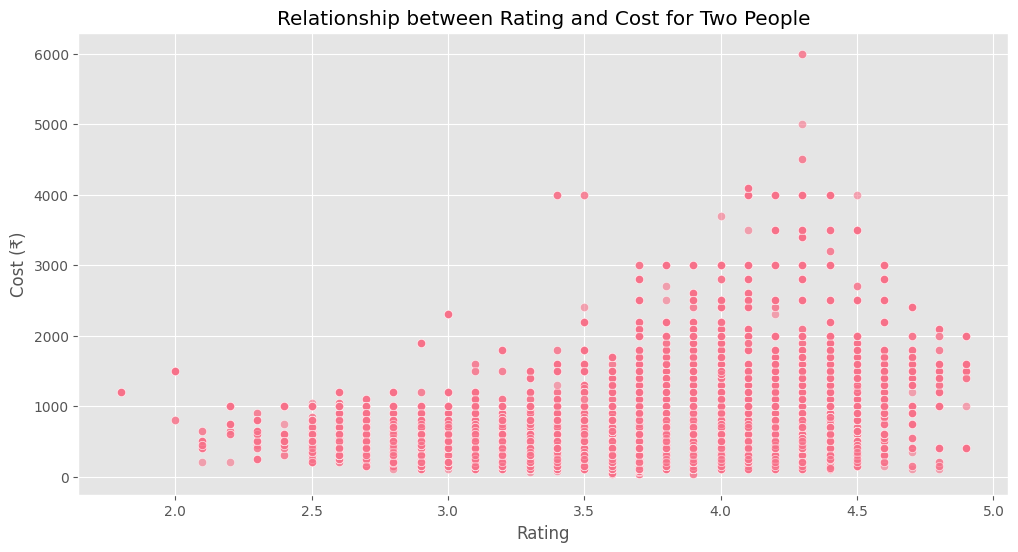

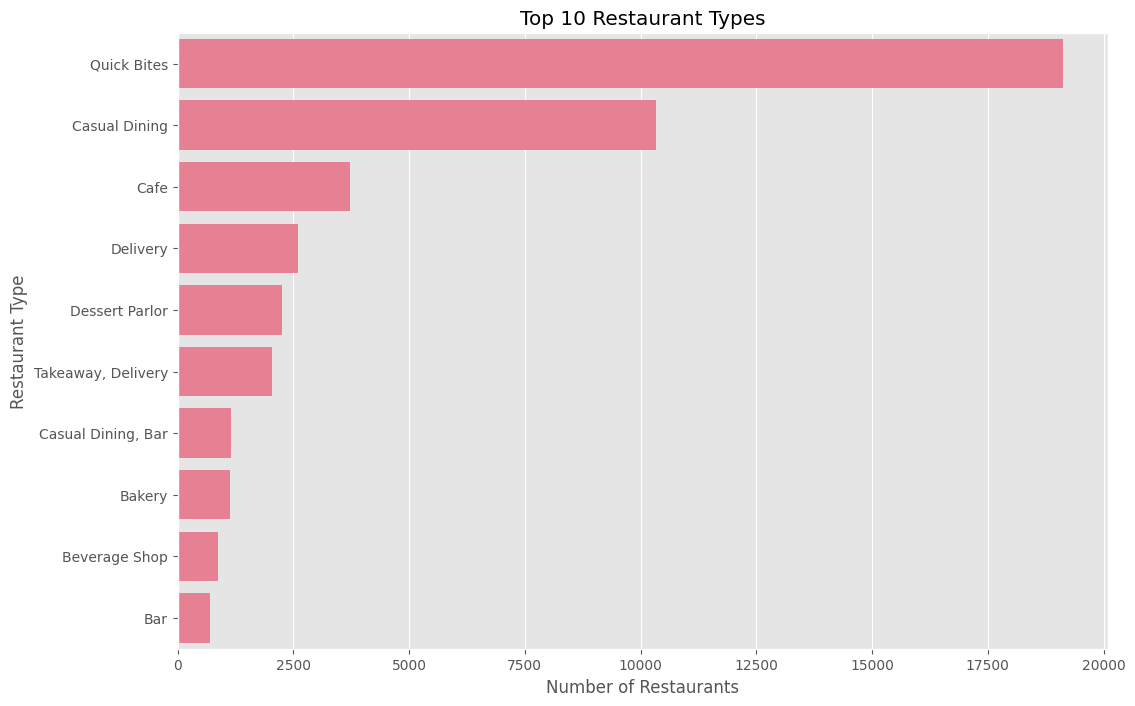

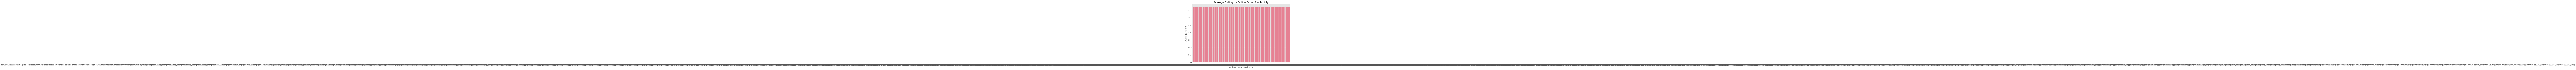

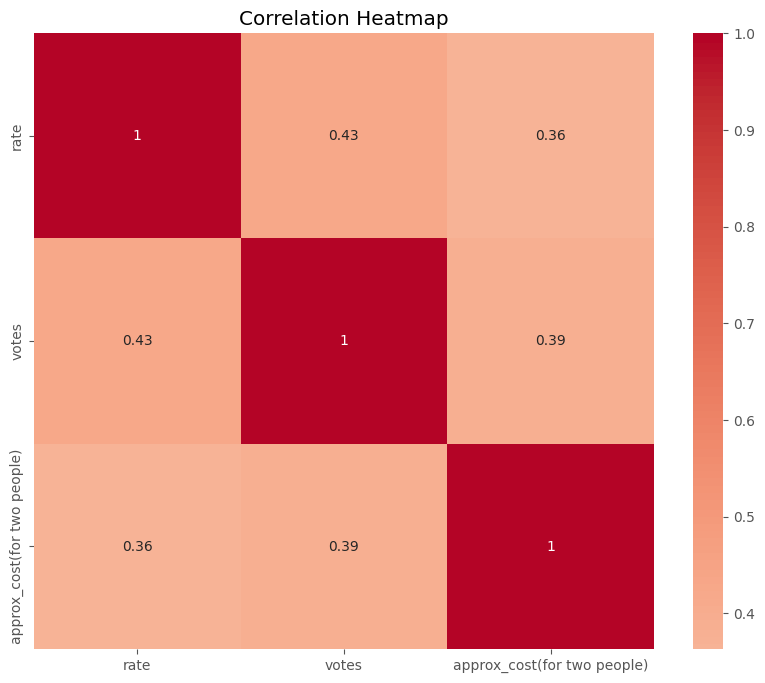

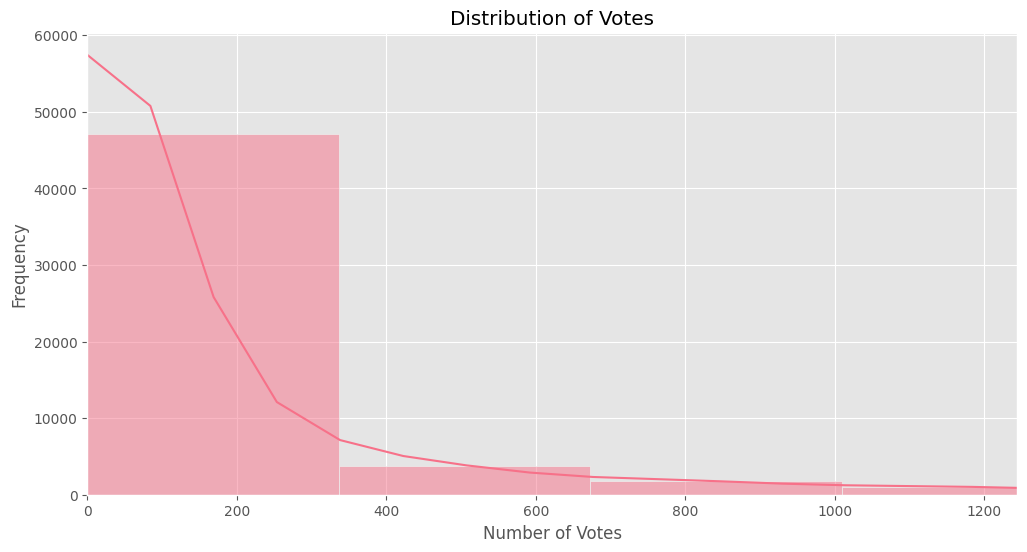

In [ ]:
# 1. Distribution of Ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['rate'].dropna(), bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['rate'])
plt.title('Box Plot of Restaurant Ratings')
plt.tight_layout()
plt.show()

# 2. Top 10 locations with most restaurants
plt.figure(figsize=(12, 6))
top_locations = df_clean['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

# 3. Distribution of approximate cost for two people
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['approx_cost(for two people)'], bins=30, kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Cost (₹)')
plt.ylabel('Frequency')
plt.show()

# 4. Online delivery vs dine-in
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
online_delivery = df_clean['online_order'].value_counts()
plt.pie(online_delivery.values, labels=online_delivery.index, autopct='%1.1f%%')
plt.title('Online Order Availability')

plt.subplot(1, 2, 2)
table_booking = df_clean['book_table'].value_counts()
plt.pie(table_booking.values, labels=table_booking.index, autopct='%1.1f%%')
plt.title('Table Booking Availability')
plt.tight_layout()
plt.show()

# 5. Top 10 cuisines
plt.figure(figsize=(12, 8))
# Split cuisines and count occurrences
all_cuisines = df_clean['cuisines'].str.split(', ').explode()
top_cuisines = all_cuisines.value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

# 6. Relationship between cost and rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=df_clean, alpha=0.6)
plt.title('Relationship between Rating and Cost for Two People')
plt.xlabel('Rating')
plt.ylabel('Cost (₹)')
plt.show()

# 7. Restaurant type distribution
plt.figure(figsize=(12, 8))
top_rest_types = df_clean['rest_type'].value_counts().head(10)
sns.barplot(x=top_rest_types.values, y=top_rest_types.index)
plt.title('Top 10 Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.show()

# 8. Average rating by online order availability
plt.figure(figsize=(10, 6))
avg_rating_online = df_clean.groupby('online_order')['rate'].mean()
sns.barplot(x=avg_rating_online.index, y=avg_rating_online.values)
plt.title('Average Rating by Online Order Availability')
plt.xlabel('Online Order Available')
plt.ylabel('Average Rating')
plt.show()

# 9. Heatmap of correlations
plt.figure(figsize=(10, 8))
numeric_df = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 10. Distribution of votes
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['votes'], bins=50, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.xlim(0, df_clean['votes'].quantile(0.95))  # Limit to 95th percentile for better visualization
plt.show()

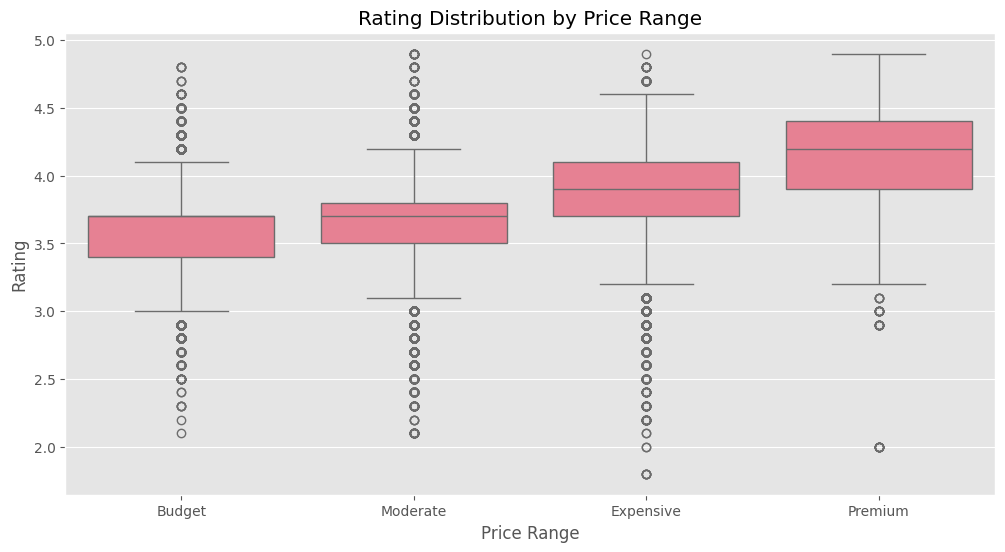

Top 20 Restaurants by Votes:
                              name               location  rate    votes  \
53506  Byg Brewski Brewing Company          Sarjapur Road   4.9  16832.0   
53995  Byg Brewski Brewing Company          Sarjapur Road   4.9  16832.0   
54461  Byg Brewski Brewing Company          Sarjapur Road   4.9  16832.0   
4076   Byg Brewski Brewing Company          Sarjapur Road   4.9  16345.0   
5002   Byg Brewski Brewing Company          Sarjapur Road   4.9  16345.0   
5158   Byg Brewski Brewing Company          Sarjapur Road   4.9  16345.0   
19865                         Toit            Indiranagar   4.7  14956.0   
20537                         Toit            Indiranagar   4.7  14956.0   
39454                     Truffles  Koramangala 5th Block   4.7  14726.0   
36411                     Truffles  Koramangala 5th Block   4.7  14723.0   
37410                     Truffles  Koramangala 5th Block   4.7  14723.0   
38740                     Truffles  Koramangala 5th Block  

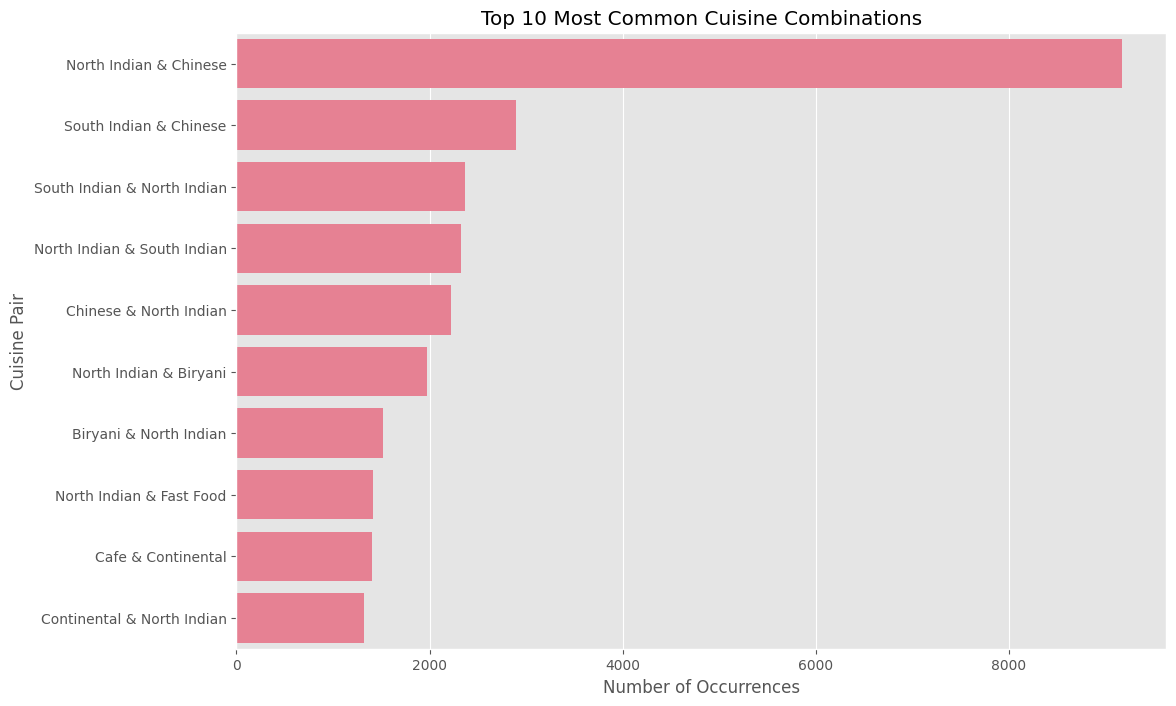

In [ ]:
# Advanced Analysis

# 11. Price range vs rating
df_clean['price_range'] = pd.cut(df_clean['approx_cost(for two people)'],
                                bins=[0, 300, 600, 1200, np.inf],
                                labels=['Budget', 'Moderate', 'Expensive', 'Premium'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='price_range', y='rate', data=df_clean)
plt.title('Rating Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

# 12. Top restaurants by votes in each location
top_restaurants = df_clean.nlargest(20, 'votes')[['name', 'location', 'rate', 'votes', 'cuisines']]
print("Top 20 Restaurants by Votes:")
print(top_restaurants)

# 13. Cuisine combination analysis
from collections import Counter
from itertools import combinations

# Get all cuisine pairs
cuisine_pairs = []
for cuisines in df_clean['cuisines'].dropna():
    if ',' in cuisines:
        cuisine_list = [c.strip() for c in cuisines.split(',')]
        pairs = list(combinations(cuisine_list, 2))
        cuisine_pairs.extend(pairs)

# Count most common pairs
pair_counts = Counter(cuisine_pairs).most_common(10)

plt.figure(figsize=(12, 8))
pairs, counts = zip(*pair_counts)
pair_labels = [f"{p[0]} & {p[1]}" for p in pairs]
sns.barplot(x=list(counts), y=pair_labels)
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Number of Occurrences')
plt.ylabel('Cuisine Pair')
plt.show()

In [ ]:
# Summary Statistics
print("=== ZOMATO DATASET ANALYSIS SUMMARY ===\n")
print(f"Total Restaurants: {len(df_clean)}")
print(f"Average Rating: {df_clean['rate'].mean():.2f}")
print(f"Average Cost for Two: ₹{df_clean['approx_cost(for two people)'].mean():.2f}")
print(f"Total Locations: {df_clean['location'].nunique()}")
print(f"Total Cuisine Types: {df_clean['cuisines'].nunique()}")
print(f"Percentage with Online Order: {df_clean['online_order'].value_counts(normalize=True)['Yes']*100:.1f}%")
print(f"Percentage with Table Booking: {df_clean['book_table'].value_counts(normalize=True)['Yes']*100:.1f}%")

# Top performers
top_rated = df_clean.nlargest(5, 'rate')[['name', 'rate', 'location', 'cuisines']]
print("\nTop 5 Rated Restaurants:")
print(top_rated.to_string(index=False))

=== ZOMATO DATASET ANALYSIS SUMMARY ===

Total Restaurants: 56252
Average Rating: 3.70
Average Cost for Two: ₹541.94
Total Locations: 2921
Total Cuisine Types: 5554
Percentage with Online Order: 54.1%
Percentage with Table Booking: 11.5%

Top 5 Rated Restaurants:
                       name  rate      location                                                      cuisines
Byg Brewski Brewing Company   4.9 Sarjapur Road Continental, North Indian, Italian, South Indian, Finger Food
Byg Brewski Brewing Company   4.9 Sarjapur Road Continental, North Indian, Italian, South Indian, Finger Food
Byg Brewski Brewing Company   4.9 Sarjapur Road Continental, North Indian, Italian, South Indian, Finger Food
     Belgian Waffle Factory   4.9  Brigade Road                                                      Desserts
     Belgian Waffle Factory   4.9  Brigade Road                                                      Desserts


Multiple visualizations using Matplotlib and Seaborn:

Distribution plots

Bar charts

Pie charts

Scatter plots

Heatmaps

Box plots



Advanced analysis including:

Price range categorization

Top restaurants by votes

Cuisine combination analysis